# Modelo Regressão - SP

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Versões dos pacotes usadas neste Jupyter Notebook
!python --version
%reload_ext watermark
%watermark -a "Mentoria DSA" --iversions

Python 3.7.3
Author: Mentoria DSA

seaborn: 0.9.0
pandas : 0.24.2
numpy  : 1.16.2



In [3]:
df = pd.read_csv("../../data/properati-BR-2016-11-01-properties-sell.csv")

In [4]:
df.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-04-25,sell,apartment,Mondubim,|Brasil|Ceará|Fortaleza|Mondubim|,NaN,NaN,NaN,NaN,155900.0,...,NaN,NaN,NaN,NaN,2.0,NaN,http://mondubim.properati.com.br/px9_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Fortaleza,https://thumbs-cf.properati.com/8/EY670SQWML7c...
1,2013-04-25,sell,house,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,950000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxv_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Manhuacu,https://thumbs-cf.properati.com/1/1VGQees9LIbx...
2,2013-04-25,sell,house,Ibatiba,|Brasil|Espírito Santo|Ibatiba|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://ibatiba.properati.com.br/pxw_vende-se_o...,"Otimo Imovel com o melhor valor da regiao, con...",Sítio Em Ibatiba,NaN
3,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxy_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,NaN
4,2013-04-25,sell,apartment,Manhuaçu,|Brasil|Minas Gerais|Manhuaçu|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://manhuacu.properati.com.br/pxz_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Manhuacu,https://thumbs-cf.properati.com/2/UhPHI8dsNCb4...


In [5]:
# separar o endereço em três colunas
df_adress = df['place_with_parent_names'].str.split('|', n=5 , expand=True)

# renomear as novas colunas
df_adress = df_adress.rename(columns={1: "Pais", 2: "Estado", 3: "Cidade", 4: "Bairro"})

# remoção das colunas criadas 0, 5 (criadas para auxiliar na separação das colunas)
del df_adress[0]
del df_adress[5]

# criação do novo dataset
new_df = pd.concat([df, df_adress], axis=1)

# Remoção de colunas insignificantes
del new_df['geonames_id']
del new_df['lat-lon']
del new_df['lat']
del new_df['lon']
del new_df['floor']
del new_df['surface_total_in_m2']
del new_df['expenses']
del new_df['image_thumbnail']
del new_df['title']
del new_df['properati_url']
del new_df['description']
del new_df['operation']
del new_df['place_with_parent_names']

# Remoção de registros com moedas e paises estrangeiros
new_df = new_df[new_df['Pais'] != 'Estados Unidos']
new_df = new_df[new_df.currency == "BRL"]

# Com os registros de informações estrangeiras removidas, pode-se remover a coluna currency e país, uma
# vez que será um valor único para todo o dataset.
del new_df['currency']
del new_df['Pais']

In [6]:
new_df.head()

,created_on,property_type,place_name,price,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,Estado,Cidade,Bairro
0,2013-04-25,apartment,Mondubim,155900.0,155608.08,48648.81,NaN,NaN,NaN,2.0,Ceará,Fortaleza,Mondubim
1,2013-04-25,house,Manhuaçu,950000.0,948221.29,296448.85,NaN,NaN,NaN,NaN,Minas Gerais,Manhuaçu,
6,2013-04-25,store,Manhuaçu,1200000.0,1197753.22,374461.71,NaN,NaN,NaN,NaN,Minas Gerais,Manhuaçu,
7,2013-04-25,apartment,Manhuaçu,95000.0,94822.11,29644.88,NaN,NaN,NaN,3.0,Minas Gerais,Manhuaçu,
8,2013-04-25,store,Manhuaçu,1200000.0,1197753.22,374461.71,NaN,NaN,NaN,NaN,Minas Gerais,Manhuaçu,


In [7]:
df = new_df[new_df['Estado'] == "São Paulo"]

In [8]:
df.shape

(585485, 13)

In [9]:
df.isnull().sum()

created_on                         0
property_type                      0
place_name                         0
price                              0
price_aprox_local_currency         0
price_aprox_usd                    0
surface_covered_in_m2         150028
price_usd_per_m2              155203
price_per_m2                  155203
rooms                         169624
Estado                             0
Cidade                             0
Bairro                           910
dtype: int64

In [10]:
# alterando o tipo da variável "property_type" para int
df['property_type'] = df['property_type'].replace("apartment", 1)
df['property_type'] = df['property_type'].replace("house", 2)
df['property_type'] = df['property_type'].replace("store", 3)
df['property_type'] = df['property_type'].replace("PH", 4)

/Users/tmgoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tmgoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tmgoncalves/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [11]:
df.head()

,created_on,property_type,place_name,price,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,Estado,Cidade,Bairro
33,2013-04-25,1,Ponta da Praia,230000.0,229569.34,71771.82,NaN,NaN,NaN,1.0,São Paulo,Santos,Ponta da Praia
34,2013-04-25,2,Guarujá,400000.0,399251.07,124820.57,NaN,NaN,NaN,2.0,São Paulo,Guarujá,
35,2013-04-25,2,São Vicente,180000.0,179662.96,56169.25,NaN,NaN,NaN,2.0,São Paulo,São Vicente,
36,2013-04-25,2,São Vicente,190000.0,189644.25,59289.77,NaN,NaN,NaN,2.0,São Paulo,São Vicente,
37,2013-04-25,1,São Vicente,195000.0,194634.87,60850.02,NaN,NaN,NaN,2.0,São Paulo,São Vicente,


In [ ]:
df = pd.read_csv("../../data/df_sp.csv")

In [ ]:
# alterando o tipo da variável "property_type" para int
df['property_type'] = df['property_type'].replace("apartment", 1)
df['property_type'] = df['property_type'].replace("house", 2)
df['property_type'] = df['property_type'].replace("store", 3)
df['property_type'] = df['property_type'].replace("PH", 1)

In [ ]:
df.head()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


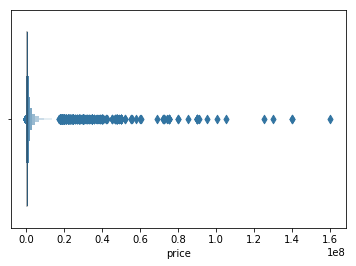

In [12]:
# identificação dos outliers do preços
sns.boxenplot(df['price'])

In [13]:
df_filter = df[df['price'] < 1000000]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


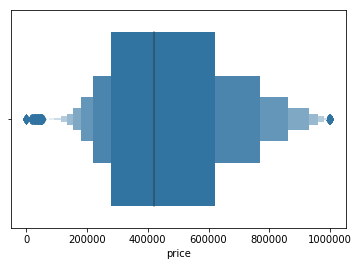

In [14]:
# identificação dos outliers do preços
sns.boxenplot(df_filter['price'])

In [15]:
len(df_filter)

452327

In [17]:
df_filter.isnull().sum()

created_on                         0
property_type                      0
place_name                         0
price                              0
price_aprox_local_currency         0
price_aprox_usd                    0
surface_covered_in_m2         119592
price_usd_per_m2              123728
price_per_m2                  123728
rooms                         118561
Estado                             0
Cidade                             0
Bairro                           800
dtype: int64

In [18]:
# Para manter o estudo organizado, será criado um outro arquivo csv
# para trabalhar o dataframe sem missing values.
df_filter.to_csv('df_treat.csv', index=False, sep= ',', encoding='utf-8')